# PW4 - Linear Regression

## Imports

In [141]:
import random
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

## Load data

Define the path to the file containing the data

In [142]:
datafile = "lausanne-appart.csv"

Read the data

In [143]:
dataset = pd.read_csv(datafile)

Display first rows

In [144]:
dataset.head()

living_area  nb_rooms  rent_price
0           69       3.0        1810
1           95       3.5        2945
2           21       1.5         685
3           20       1.0         720
4           33       1.5         830

## Exercise 1 - Visualize the data

a) Plot a histogram to visualize the distribution of the renting price

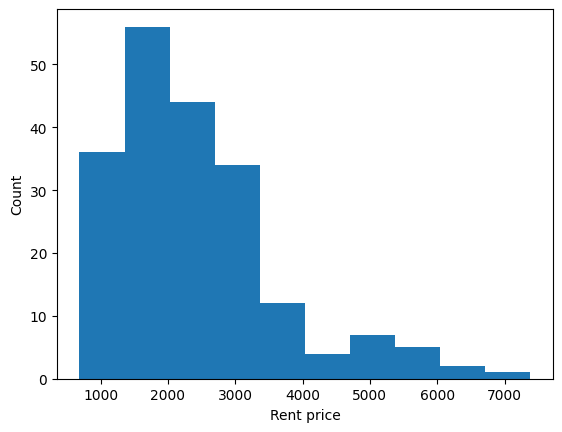

In [145]:
# Your code here

plt.hist(dataset["rent_price"])
plt.xlabel("Rent price")
plt.ylabel("Count")
plt.show()

b) Plot a histogram to visualize the distribution of the living area

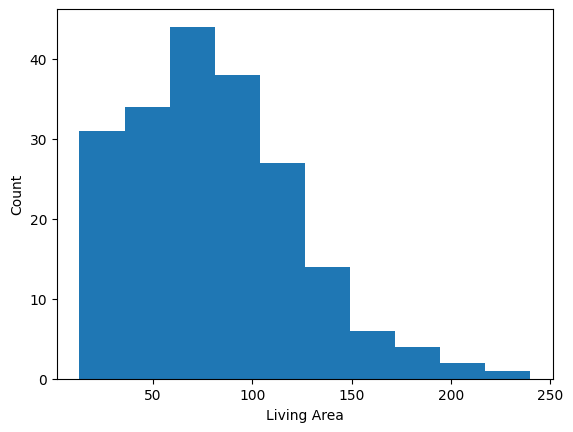

In [146]:
# Your code here

plt.hist(dataset["living_area"])
plt.xlabel("Living Area")
plt.ylabel("Count")
plt.show()

c) Plot a scatter plot of renting price as a function of living area

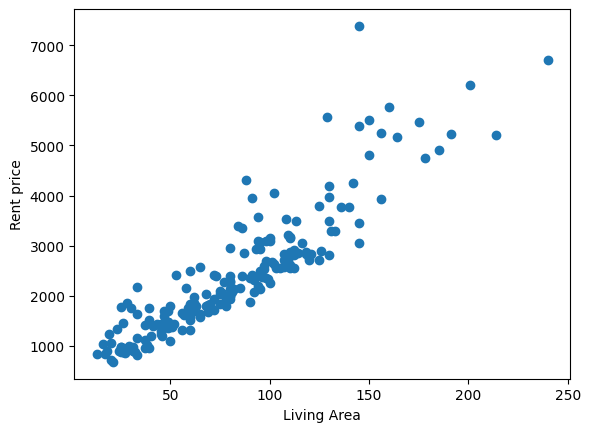

In [147]:
# Your code here

plt.scatter(dataset["living_area"], dataset["rent_price"])
plt.xlabel("Living Area")
plt.ylabel("Rent price")

plt.show()

## Exercise 2 - Normal equations for linear regression

a) Implement the closed form solution to this problem using the following normal equation:

<div><div style="display: table-cell; width: 100%;"><center>$\theta = (X^{T}X)^{-1}X^{T}\vec{y}$</center></div><div style="display: table-cell; width: 100%;">$(3)$</div></div>

Assuming $x$ is the living area and $y$ is the renting price. Use `numpy` for the vector operations. Plot the computed line on top of the scatter plot of exercise 1.

Theta : [240.07710727  26.33242457]


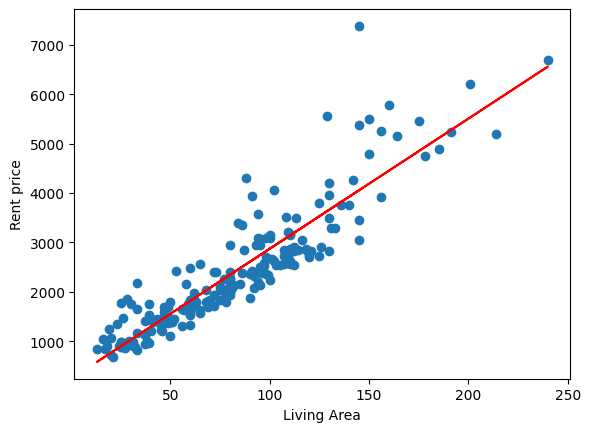

In [148]:
# Your code here
X = dataset["living_area"].to_frame()
X.insert(0, "x0", 1) # add the column full of ones at the start, this represents x0
X = np.array(X)

y = np.array(dataset["rent_price"])

theta = np.linalg.inv(X.T @ X) @ X.T @ y 

print(f"Theta : {theta}")


plt.scatter(dataset["living_area"], dataset["rent_price"])
plt.xlabel("Living Area")
plt.ylabel("Rent price")

y_regr = theta[0] + theta[1] * X[:,1]
plt.plot(X[:,1], y_regr, color='red', label='Regression line')

plt.show()

b) Compute the overall cost value according to the following equation:

<div><div style="display: table-cell; width: 100%;"><center>$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$</center></div><div style="display: table-cell; width: 100%;">$(2)$</div></div>

In [ ]:
# Your code here
def cost_J(y_pred, y):
    return (1/(2*len(y))) * np.sum((y_pred - y)**2)

y_pred = X @ theta
# print(y_pred)
# print(X)
closed_form_cost = cost_J(y_pred, y)
print(f" Overall cost : {closed_form_cost}")

 Overall cost : 138034.95779787414


## Exercise 3 - Gradient descent for linear regression

Implement the _full batch_ gradient descent algorithm for the previous problem. As seen in the
theory, the update rules are:

<div><div style="display: table-cell; width: 100%;"><center>$\theta_{0} \leftarrow \theta_{0} - \alpha \frac{1}{N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})$</center></div><div style="display: table-cell; width: 100%;">$(6)$</div></div>

<div><div style="display: table-cell; width: 100%;"><center>$\theta_{1} \leftarrow \theta_{1} - \alpha \frac{1}{N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n}) x_{n,1}$</center></div><div style="display: table-cell; width: 100%;">$(7)$</div></div>

**Remark** You need to iterate several times over the training set. If you have problems of convergence, you need to use a smaller value of $\alpha$. Values such as $0.000001$ are common.

In [ ]:
# Your code here

theta = np.zeros((2))


alpha = 0.0001 # i got the best results with those parameters

max_iter = 1000000
costs = []

for i in range(0, max_iter): # we could also use a delta on the cost function with a while to stop when the cost is not improving but we wanted to see the curve after x iterations
    y_pred = X @ theta
    theta[0] = theta[0] - alpha * (1/len(y)) * np.sum(y_pred - y)
    theta[1] = theta[1] - alpha * (1/len(y)) * np.sum((y_pred - y) * X[:,1])  

    c = cost_J(y_pred, y) # to plot the costs over iters
    costs.append(c)

y_pred = X @ theta
print(f"Theta = {theta}")
print(f"Cost = {cost_J(y_pred, y)}")


Theta = [240.07710713  26.33242457]
Cost = 138034.95779787414


a) Plot the cost value (Equation 2) as a function of the iterations. What do you observe?

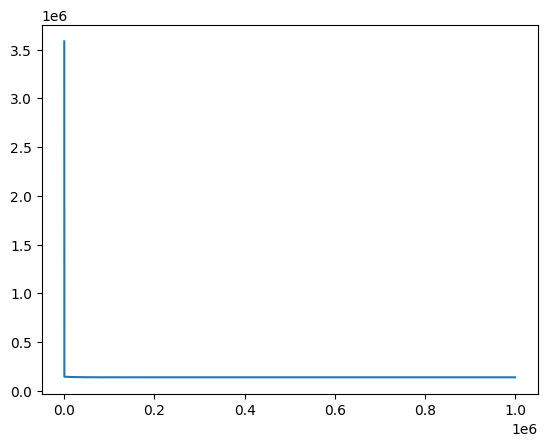

In [167]:
# Your code here
plt.plot(range(0, len(costs)), costs)
plt.show()

In this scenario, we can clearly observe a plateau of the cost function. This means that we have reached a local minimum while trying to minimise the cost.

b) Imagine a stopping criterion, i.e. when do we stop iterating on the training set?

The stopping criterion can be a small delta between each calculations of the cost. Like if the cost did not change of at least delta, this means we are in a plateau and should stop.

c) Plot the computed line $h_{\theta}(\mathbf{x})$ on top of the scatter plot of exercise 1.

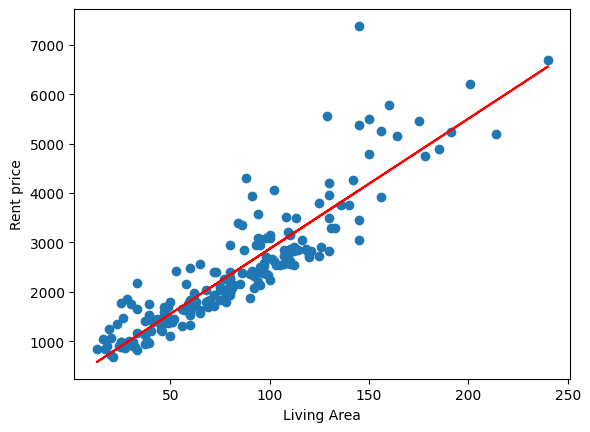

In [152]:
plt.scatter(dataset["living_area"], dataset["rent_price"])
plt.xlabel("Living Area")
plt.ylabel("Rent price")

y_regr = theta[0] + theta[1] * X[:,1]
plt.plot(X[:,1], y_regr, color='red', label='Regression line')

plt.show()

d) Compute the final cost value according to Equation 2 and compare it to the one of exercise 2. What can you conclude?

In [153]:
# Your code here

print(f"The best cost value is {best_cost}, the exercice 2 cost value is {closed_form_cost}")

The best cost value is 138034.95779787409, the exercice 2 cost value is 138034.95779787414


We took some time to experiment with the alpha and max_iter values to try to get the best possible result. It seems that the closed form formula is the best one but we can get really close by tweaking those two values. 

## Exercise 4 - Stochastic gradient descent for linear regression

Implement the stochastic gradient descent algorithm for the previous problem. As seen in the theory, the update rules are:

<div><div style="display: table-cell; width: 100%;"><center>$\theta_{i} \leftarrow \theta_{i} - \alpha (h_{\theta}(\mathbf{x}_{n}) - y_{n}) x_{n,i}$</center></div><div style="display: table-cell; width: 100%;">$(8)$</div></div>

In [ ]:
# Your code here
import random
theta = np.zeros((2))


alpha = 0.000001 # i got the best results with those parameters

max_iter = 1000
costs = []

best_cost = np.inf

for i in range(0, max_iter): # we could also use a delta on the cost function with a while to stop when the cost is not improving but we wanted to see the curve after x iterations
    rand = int(random.random() * X.shape[0])
    y_pred_stoch = X[rand] @ theta
    theta[0] = theta[0] - alpha * (y_pred_stoch - y[rand])
    theta[1] = theta[1] - alpha * (y_pred_stoch - y[rand]) * X[rand,1]

    y_pred = X @ theta
    costs.append(cost_J(y_pred, y))


y_pred = X @ theta
print(cost_J(y_pred, y))
print(theta)

144176.78676766725
[ 0.32486065 28.59143527]


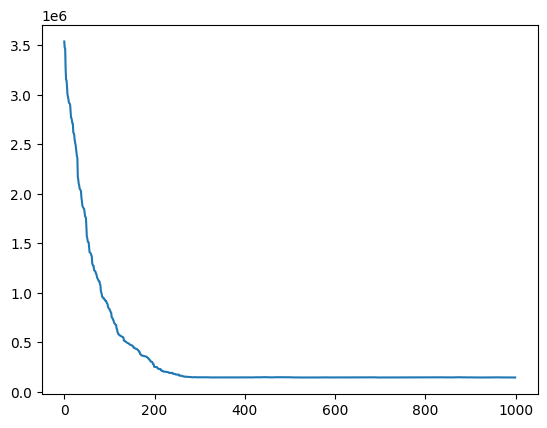

In [178]:
plt.plot(range(0, len(costs)), costs)
plt.show()

a) Plot the computed line $h_{\theta}(\mathbf{x})$ on top of the scatter plot of exercise 1.

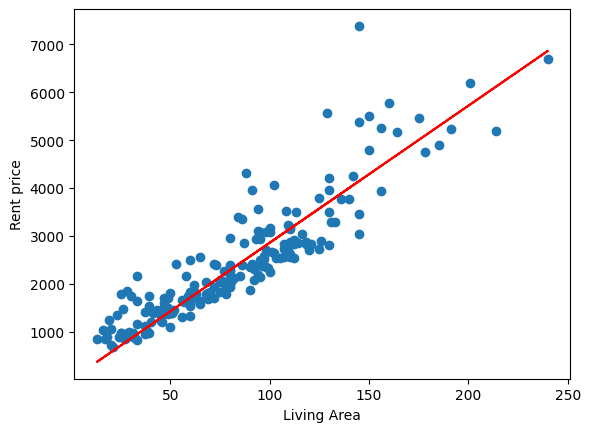

In [179]:
# Your code here
plt.scatter(dataset["living_area"], dataset["rent_price"])
plt.xlabel("Living Area")
plt.ylabel("Rent price")

y_regr = theta[0] + theta[1] * X[:,1]
plt.plot(X[:,1], y_regr, color='red', label='Regression line')

plt.show()

b) How many samples do you need to visit for reaching the convergence?

The biggest improvements are made before the first 300ish iterations but smaller improvements still occur after that. If we were very limited in cpu time, we would tell that the convergence vas reached around 300 samples

c) What kind of stopping criterion could we use here?

We would use the delta of the global cost function. When we compute the cost function, we can stop the iterations when the result is not improving more than a set delta.

d) Compute the final cost value according to Equation 2 and compare it to the one of exercise 2 and 3. What can you conclude?

In [180]:
# Your code here
y_pred = X @ theta
print(cost_J(y_pred, y))
print(theta)

144176.78676766725
[ 0.32486065 28.59143527]


The result is really close to both of the other methods but the stochastic is way faster because we dont loop trough the whole dataset for each update. The stochastic might have a slightly worse final result because it is harder to find the exact perfect values but its speed and efficency compensates this.

## Exercise 5 - Review questions

a) The linear regression has a mathematical _closed form_ solution. Then, in which conditions would we prefer a gradient descent algorithm to compute the regression model?

_Your answer here_

b) Outliers in a data set can be defined as values that are out of the "usual" range in comparison with other values. They typically come from noise or anomalies in the data capturing process. What is the impact of an outlier in the stochastic gradient descent process? What if we have many outliers? _Hint_: look at the equation of the MSE, and to the equation of the update rule.

_Your answer here_

c) In the case of stochastic gradient descent, what is the danger of having a too large or too small $\alpha$ value? Could you think of a better (more advanced) strategy as the one stated in Slide 36?

_Your answer here_

d) Let's assume we expect that the target variable $y$ has a dependency to the square and to the cube of one of the feature $x_d$ in our multi-variable training set $(x_1, \ldots, x_d, \ldots, x_D)$. How would you proceed? Do we need to take precautions in terms of numerical stability?

_Your answer here_

e) _Advanced_. Could we use a descent algorithm without computing the gradient? If yes, give a pseudo code of the algorithm to find $(\theta_{0}, \theta_{1})$ using a linear regression $h_{\theta}(x) = \theta_0 + \theta_1 x$.

_Your answer here_